<a href="https://colab.research.google.com/github/Savanth114/ML-PROJECTS/blob/main/1_Predict_Restaurant_Ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 : Predict Restaurant Ratings

**STEP-1 :** Preprocess the dataset by handling missing values,
encoding categorical variables, and splitting the data
into training and testing sets.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("/content/Dataset.csv")
print("Initial Data Overview:")
display(df.head())
print("\n Data Info:")
print(df.info())

print("\n Missing Values:\n", df.isnull().sum())

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

assert df.isnull().sum().sum() == 0, "There are still missing values in the dataset!"

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

target_column = "Aggregate rating"
if target_column not in df.columns:
    raise ValueError("Target column 'Aggregate rating' not found!")

X = df.drop(target_column, axis=1)
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n Data Split Summary:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Initial Data Overview:


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229



 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch t

# Task 1 Using Random Forest Regressor

**STEP-2 :** Select a regression algorithm (RandomForestRegressor) and train it on the training data.


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

print("Trained: Random Forest Regressor")

Trained: Random Forest Regressor


**STEP-3 :** Evaluate the model's performance using appropriate
regression metrics (R-squared) on the testing data.

In [ ]:
from sklearn.metrics import r2_score

y_pred = rf_model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print("R² Score on Test Data:", r2)

R² Score on Test Data: 0.9880277372948216


**STEP-4 :** Interpret the model's results and analyze the most
influential features affecting restaurant ratings.

Top Influential Features (Ranked):
                 Feature  Importance
19                 Votes    0.898997
17          Rating color    0.081244
18           Rating text    0.008168
0          Restaurant ID    0.002258
7              Longitude    0.001381
4                Address    0.001304
1        Restaurant Name    0.001302
9               Cuisines    0.001265
8               Latitude    0.001231
10  Average Cost for two    0.000953


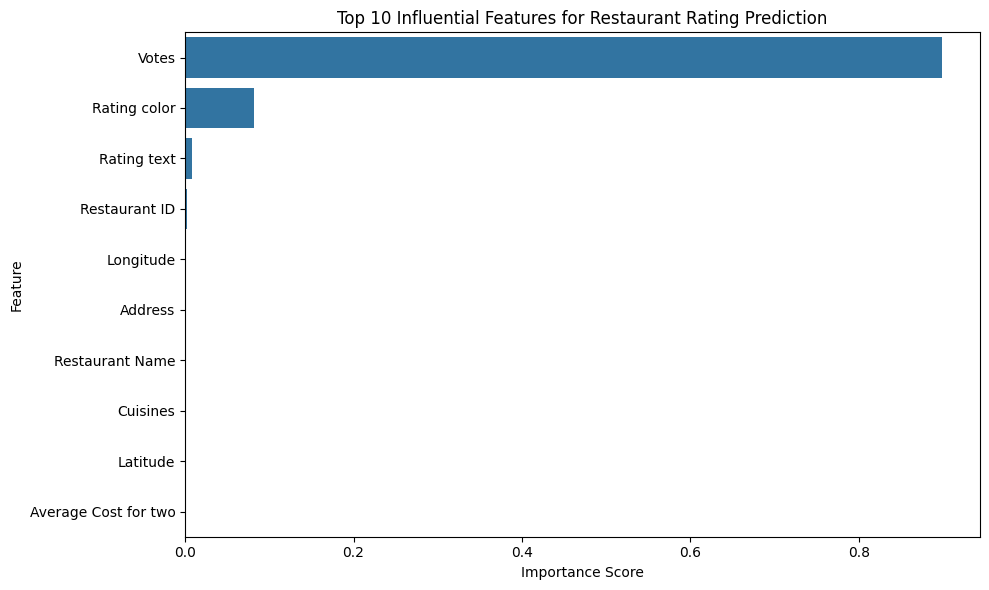

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print("Top Influential Features (Ranked):")
print(feature_importance.head(10))

plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature')
plt.title('Top 10 Influential Features for Restaurant Rating Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Task 1 Using Linear Regression

STEP-2 : Select a regression algorithm (Linear Regression) and train it on the training data

In [ ]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

print("Trained: Linear Regression")
print("Intercept:", linear_model.intercept_)
print("Coefficients:", linear_model.coef_)

Trained: Linear Regression
Intercept: 3.7025043202814665
Coefficients: [-3.72724341e-08  2.21753697e-06  6.64563182e-03 -3.03138338e-03
 -2.23524368e-05 -3.70632830e-04  7.52688595e-05  8.82072656e-04
 -1.24175150e-03 -2.07541286e-04  1.39313419e-06 -8.40778009e-02
 -6.53048395e-03  6.76117009e-01 -3.56217318e-02 -1.11022302e-16
  4.95677680e-01 -1.95193715e-01 -1.98414451e-01  4.86479410e-04]


STEP-3 : Evaluate the model's performance using appropriate regression metrics (mean squared error) on the testing data.


In [ ]:
from sklearn.metrics import mean_squared_error

y_pred_linear = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)

print("Evaluation of Linear Regression Model:")
print(f"Mean Squared Error (MSE): {mse_linear:.4f}")

Evaluation of Linear Regression Model:
Mean Squared Error (MSE): 1.2187


STEP-4 : Interpret the model's results and analyze the most influential features affecting restaurant ratings.

Top Influential Features (Linear Regression):
                Feature  Coefficient
13  Has Online delivery     0.676117
16          Price range     0.495678
18          Rating text    -0.198414
17         Rating color    -0.195194
11             Currency    -0.084078
14    Is delivering now    -0.035622
2          Country Code     0.006646
12    Has Table booking    -0.006530
3                  City    -0.003031
8              Latitude    -0.001242


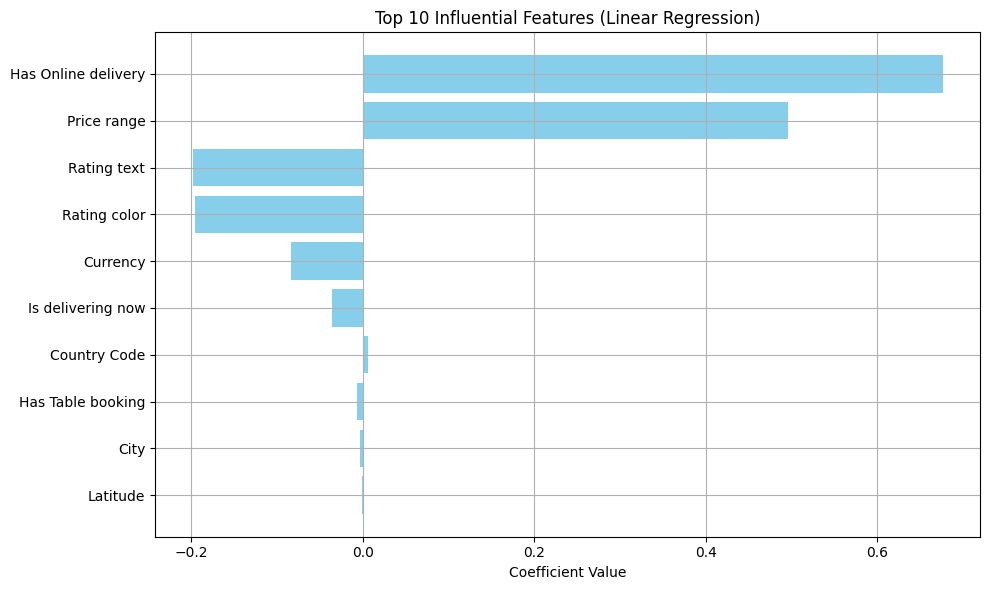

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linear_model.coef_
})

coefficients_df['Absolute Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

print("Top Influential Features (Linear Regression):")
print(coefficients_df[['Feature', 'Coefficient']].head(10))

top_features = coefficients_df.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Top 10 Influential Features (Linear Regression)')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()